## Spider
A spider is a piece of code that retrieve useful information from the source code of a web page, and we will develop a spider to crawl images from https://www.shutterstock.com/

In [1]:
# This are the required package 
import requests
import re
from bs4 import BeautifulSoup
from selenium import webdriver
import IPython.display

### Request and Response
A spider has framework that is similar to a browser. It would request a server for the information of a web page through a URL. e.g.

In [3]:
# request a website url and store the response in variable "information"
information = requests.get("http://blog.csdn.net/u012223913/article/details/76532776")
# print the html code of the request web page
print (information.text)


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
    
    <html xmlns="http://www.w3.org/1999/xhtml">
    
<head>          
            <link rel="canonical" href="http://blog.csdn.net/u012223913/article/details/76532776"/> 

   

  
 <meta http-equiv="Cache-Control" content="no-siteapp" /><link rel="alternate" media="handheld" href="#" />

    <meta name="shenma-site-verification" content="5a59773ab8077d4a62bf469ab966a63b_1497598848"> 
       
    <title>ubuntu conda install ERROR missing write permission错误 - Adrianna的专栏
        - CSDN博客</title>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
    <meta name="description" content="reference：   https://askubuntu.com/questions/726184/missing-write-permissions-in-home-user-anaconda2 报错：CondaIOError: Missing write permissions in: /usr/local/anaconda3## You don&#39;t appear to have t" />

    <meta name="keywords" content="ubuntu,conda" />

   
   

### Exception Handling
When developing a spider, it is a good practice to do exception handling, which is to consider the cases like server down, no network connection... because it is very often that server might be under maintenance from time to time. Using Exception Handling, we can prevent our spider mulfunctions when it couldn't get response from the URL

In [4]:
spider = requests.get("https://the_server_is_down.xxx")

#Please replace above line with:
#try:
#    spider = requests.get("https://the_server_is_down.xxx")
#except Exception as e:
#    print (e)


ConnectionError: HTTPSConnectionPool(host='the_server_is_down.xxx', port=443): Max retries exceeded with url: / (Caused by <class 'socket.gaierror'>: [Errno -2] Name or service not known)

### The usage of header
It is possible that you have a good network connection and the server is not down, however, you couldn't requests the html code with your spider. One possible reason is that website might refuse to response to spider's requests, because too many requests from spiders might slow down the server.
In those cases, we would try to disguise our spider as a "browser: by giving it a "header"
header is a piece of information that help server differentiate different kind of requests. E.g. python script, google chrome, safari... 

In [5]:
# try to request source code from "https://www.openrice.com" If error happens, show the message
try:
    openrice = requests.get("https://www.openrice.com")
except Exception as e:
    print (e)

HTTPSConnectionPool(host='www.openrice.com', port=443): Max retries exceeded with url: / (Caused by <class 'httplib.BadStatusLine'>: '')


In [6]:
# this is a header that would help our spider to pretent that it is a chrom browser
myheader = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
try:
    openrice = requests.get("https://www.openrice.com",headers=myheader)
except Exception as e:
    print (e)
else:
    print (openrice.text)


<!DOCTYPE html>
<html lang="en-US" class="or-web">
<head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# website: http://ogp.me/ns/website#">
        <meta charset="utf-8" />
    <title>Singapore Restaurants Guide Singapore Restaurant | OpenRice Singapore</title>
    <meta name="theme-color" content="#ffcb05" />
    <meta name="viewport" content="width=1280" />
            <link rel="dns-prefetch" href="//cdn1.sg.orstatic.com">
            <link rel="dns-prefetch" href="//cdn2.sg.orstatic.com">
            <link rel="dns-prefetch" href="//cdn3.sg.orstatic.com">
            <link rel="dns-prefetch" href="//cdn4.sg.orstatic.com">
                        <meta property="og:title" content="Singapore Restaurants Guide Singapore Restaurant | OpenRice Singapore">
                        <meta property="og:url" content="https://sg.openrice.com/en/singapore">
                        <meta property="og:description" content="OpenRice.com is Hong Kong&#39;s most popular dining guide to hel

### Javascript Rendering
Sometimes, parts of the website contents could be generated by Javascript to achieve dynamic effects. A browser is capable of "Javascript Rendering" ,therefore, able to show those dynamic contents. However, a simple spider only receives the raw html source and couldn't generate the dynamic contents

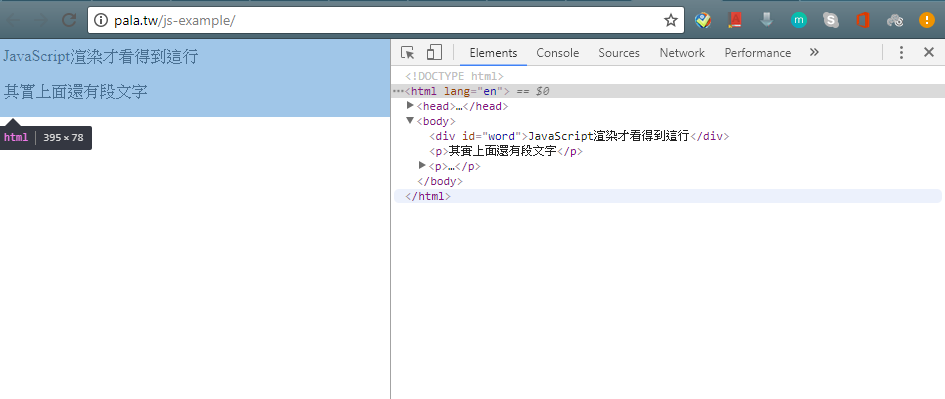

In [7]:
# Spider couldn't get part of the content 
dumpSpider = requests.get("http://pala.tw/js-example/")
print (dumpSpider.text)

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>消失的文字</title>
</head>
<body>
    <div id="word"></div>
    <p>其實上面還有段文字<p>
    <script type="text/javascript" src="example.js"></script>
</body>
</html>


In these case, we would use a "Smarter" spider -- "phantomjs"
You can consider it as a light-weight browser which is capable of javascript rendering

In [8]:
# we would initiate a smarter modules to do request and light weight rendering
smarterSpider = webdriver.PhantomJS()
smarterSpider.get("http://pala.tw/js-example/")
print (smarterSpider.page_source)

<!DOCTYPE html><html lang="en"><head>
    <meta charset="UTF-8">
    <title>消失的文字</title>
</head>
<body>
    <div id="word">JavaScript渲染才看得到這行</div>
    <p>其實上面還有段文字</p><p>
    <script type="text/javascript" src="example.js"></script>

</p></body></html>


### Ways of Extracting information
After we get the source code, we need to extract the needed information e.g. block of text, url to images...

#### Regular Expression

In [9]:
#Regex practice 1

phone = '''
8408-2261 3442-8888 4739-5151 3542-1867
7428-9097 3442-1999 3441-8095 3442-6052
8042-1600 5505-2311 3http://localhost:8888/notebooks/Desktop/Untitled3.ipynb?kernel_name=python2#442-6066 6506-6052
2442-9763 3442-8478 3442-7654 5401-3206
6505-1303 3442-7151 3442-2410 3442-2300
7041-6502 3442-9094 1200-8789 3442-1111
'''

#Task:List out phonecalls that are likely from City (start with 3442)
a= re.findall('3442-\d{4}',phone)

for element in a:
 print element

3442-8888
3442-1999
3442-6052
3442-8478
3442-7654
3442-7151
3442-2410
3442-2300
3442-9094
3442-1111


In [10]:
#Regex practice 2

Message='''
sijndsjindc3lnlkdsndk42cnlhdgak
skdc421nsjdnksjd4nfsl24dljfndlj
dnldnlskdnc112pei1nsnlaad9soe3l
sjnc51leknsal919skcoadnlsndf331
'''
#Task:Find out all the 3-digit sequential numbers inside the secret message 

a = re.findall('[0-9]{3}',Message)
print a

['421', '112', '919', '331']


In [11]:
#Regex practice 3

Introduction= '''
Welcome to the second IT workshop provided by Hall2 IT Team. 
You may learn more about "spidar" after this workshop. 
Spidar is a type of insect,
but in the field of computer science 
spidar has a special meaning.
Spidar is also called "crawler".
It is a tool which we use to extract useful information from websites.
Spidar is not difficult. 
Upon learning spidar, you can also get some idea about html and regular expression.
'''

#Task: Match the sentences that start with "spidar"

a= re.findall('^spidar[^\.\n]+',Introduction, re.I|re.M)
print a

['Spidar is a type of insect,', 'spidar has a special meaning', 'Spidar is also called "crawler"', 'Spidar is not difficult']


In [12]:
#Regex practice 4

MyWebpage='''
<html>
<head><title>Definition List Example</title></head>
<body>

<dl>
<dt><b>Word 1</b></dt>
  <dd>This corresponds to the meaning of word 1.</dd><br><br>
<dt><b>Word 2</b></dt>
  <dd>This corresponds to the meaning of word 2.</dd><br><br>
<dt><b>Regular Expression</b></dt>
  <dd>A sequence of symbols and characters used for pattern-matching</dd><br><br>
<dt><b>Spidar</b></dt>
  <dd>A tool in computer science that can extract useful information from the web
</dl>

</body>
</html>
'''
#Task:Find out the descriptions of each term in the definition list 
#Hint:<dt>refers to the term name in the list; <dd>refers to the description of each term

a=re.findall('<dt><b>([^<\n]+)', MyWebpage)

b=re.findall('<dd>([^<\n]+)', MyWebpage)

#Rearrrange the matched term and descriptions
c = [i+": "+j for i, j in zip(a,b)]

for element in c:
    print element

Word 1: This corresponds to the meaning of word 1.
Word 2: This corresponds to the meaning of word 2.
Regular Expression: A sequence of symbols and characters used for pattern-matching
Spidar: A tool in computer science that can extract useful information from the web


In [13]:
#Regex practice 5

MyWebpage= '''
<html>
<head><title></title></head>
<body>
<map name="areas">
<area shape="rect" coords="7,5,71,21" 

  href="http://warebiz.tripod.com/cpp.htm">
<area shape="rect" coords="80,5,143,21" 

  href="http://warebiz.tripod.com/html.htm">
<area shape="rect" coords="154,5,219,22" 

  href="http://warebiz.tripod.com/qbasic.htm">
</map>
<img src="http://www.codeproject.com/useritems/htmlguide/imgmapping.jpg" 

     width="225" height="26" alt="Sample image" usemap="#areas">

</body>
</html>
'''

#Task: Extract the image url from the code

a=re.findall('src="([^"]+)', MyWebpage)
print a

['http://www.codeproject.com/useritems/htmlguide/imgmapping.jpg']


#### BeautifulSoup Module explanation

Beautiful Soup is a package that let you retrieve information from structured data a lot easier. We just pass the html source to the BeautifulSoup modules, and we can implement the idea of tag, attribute. Below is examples

In [11]:
contents = '''
<body>                
    <div id = 'first div' class='division'>             
        <p id = 'header'>This is a demo</p>    
        <p> First line...... </p>    
        <p> Second line...... </p>    
    </div>
    <div>  
        <p> Second block...... </p>
    </div>
    <p> Finish by this line </p>        
</body>
<footer>
    <p>...</p>
</footer>
'''
# we pass the raw html source to the BeautifulSoup module and parse it with a parser named 'html'
# this soup element allows us to retrieve data easily
soup = BeautifulSoup(contents,'html')
print soup

<html><body>
<div class="division" id="first div">
<p id="header">This is a demo</p>
<p> First line...... </p>
<p> Second line...... </p>
</div>
<div>
<p> Second block...... </p>
</div>
<p> Finish by this line </p>
</body>
<footer>
<p>...</p>
</footer>
</html>


/usr/local/lib/python2.7/dist-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 162 of the file /usr/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [12]:
# we can directly access the tag and find the value of specific attribute
# we can get all the contents included in the first <div> that we've found
print soup.div


<div class="division" id="first div">
<p id="header">This is a demo</p>
<p> First line...... </p>
<p> Second line...... </p>
</div>


In [13]:
# we can get the value of attribute directly
print soup.div.get('id')
print soup.div.get('class')

first div
['division']


In [14]:
# we can get pure text under certain tag
print soup.div.get_text()


This is a demo
 First line...... 
 Second line...... 



Exercise:

In [15]:
# please retrive <footer> tag and all its content
# please insert your code below
# ==================================================


# ==================================================

BeautifulSoup also implements the idea of parent, siblings and children, which make it even easier to retrieve the data

In [16]:
contents = '''
<body>                
    <you>             
        <p> your children </p>    
        <p>...</p>    
        <p>...</p>    
    </you>
    <div>  
        <p>...</p>
    </div>
    <p> I am your sibling</p>        
<body>
'''
soup = BeautifulSoup(contents,"html")

print 'Find the parent tag with all its contents:'
print soup.you.find_parent(),'\n'
print 'Find all your siblings:'
print soup.you.find_next_siblings(),'\n'
print 'Find all your children:'
print soup.you.findChildren()

Find the parent tag with all its contents:
<body>
<you>
<p> your children </p>
<p>...</p>
<p>...</p>
</you>
<div>
<p>...</p>
</div>
<p> I am your sibling</p>
</body> 

Find all your siblings:
[<div>\n<p>...</p>\n</div>, <p> I am your sibling</p>] 

Find all your children:
[<p> your children </p>, <p>...</p>, <p>...</p>]


Exercise: please print out the < important > tag with all it's content using the idea of siblings

In [17]:
contents = '''
<body>                
    <div>             
        <p>...</p>    
        <p>...</p>    
        <p>...</p>    
    </div>
    <div>  
        <p>...</p>
    </div>
    <important> Very Important Message!!! </important>
<body>
'''

soup = BeautifulSoup(contents,'html')

# please insert your code below
# ==============================================


# ==============================================

We would demonstrate how we use beautifulsoup to retrieve data in practice

In [18]:
# we first get the html code from a website, and parse it with BeautifulSoup packages and store it as soup
page = requests.get("http://www.cityu.edu.hk/cityu/about/welcome.html")
soup = BeautifulSoup(page.content, 'html')

# We then get all the <meta> information within the website, meta data are basic information provided by the 
# website author 
retrievedData = soup.meta
print retrievedData

print '================================================'

# we can use 
while retrievedData is not None:
    retrievedData = retrievedData.find_next_sibling("meta")
    if retrievedData is None:
        break
    else:
        print retrievedData,'\n'

<meta charset="utf-8"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/> 

<meta content="City University of Hong Kong" name="author"/> 

<meta content="INDEX, FOLLOW" name="robots"/> 

<meta content="width=device-width; initial-scale=1.0; maximum-scale=1.0;" name="viewport"/> 

<meta content="IE=Edge" http-equiv="X-UA-Compatible"/> 



### how to save retrieved image, text
Picture is actually just binary data, we can save an image by just writing those binary data to a file. To download image from web, it requires two steps <br>
<li>1. request the data of the image through the URL to that image</li>
<li>2. write those data to a local file</li>

In [3]:
pic = requests.get('https://i.ytimg.com/vi/2N0yWIzaVEM/maxresdefault.jpg')

# saved the binary data as saved.img   'wb' means write binary data to the file
with open('saved.jpg','wb') as file:
    file.write(pic.content)

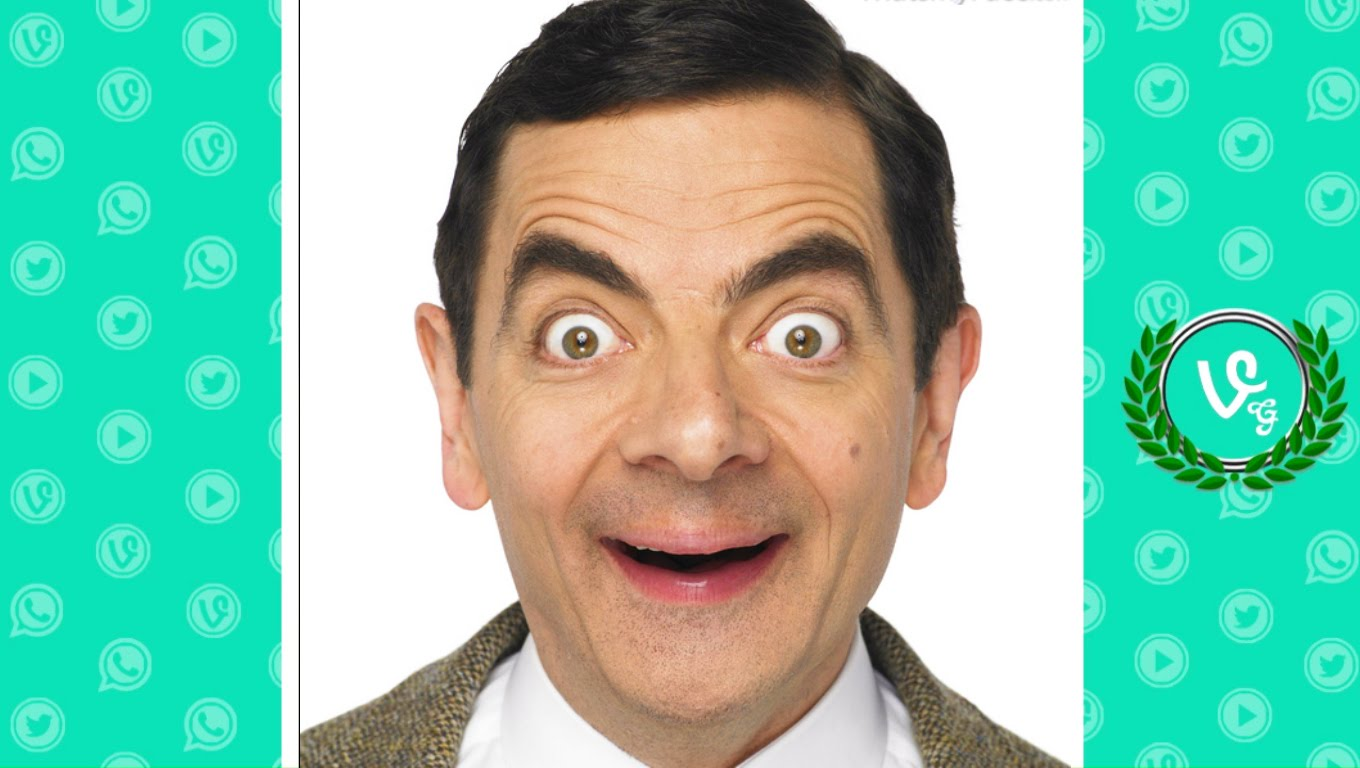

In [4]:
# visualize the image that you just saved   
image = IPython.display.Image('saved.jpg')
IPython.display.display(image)

### Summary
There's no one ultimate spider that is capable of doing all tasks. When develop a spider, we need to be clear with our target and design the code with respect to the website structure. Website is written by human, therefore, there is always a logic in how they construct the website. What we should do is to find out the rules in the website and develop our spider accordingly

In [6]:
# save the image to a self-defined directory.
# This step might vary from case to case, choose the case that meet your Operating System and delete the other one
# for mac/linux user:
#===============================
directory = '.'   # specify the path that you would like to save the image to, by default is same as your ipython notebook directory
!mkdir = $directory    # create a folder if the path doesn't exist
#===============================

# for windows user:
#===============================
#directory = '.'    # by default set the directory same as your ipython notebook, or you can create a folder MANUALLY

mkdir: .: File exists


In [7]:
import requests
import re
from bs4 import BeautifulSoup
from selenium import webdriver


'''
This is a spider written to crawl images from "https://www.shutterstock.com/"
It takes three argument:
      url : the url of the page to crawl
      pagenumber : an index of the page number of search result
      keyword : the keyword you search image with, default keyword is 'cat'
'''

def crawler(url = None,pagenumber=1,keyword = 'cat'):

  # Part 1, initiate some default value (url, spider, header)
  #====================================================================================================================
  server = 'https://www.shutterstock.com' # the default url to the server that we want to crawl image on
  
  # header is a pair of data to trick the server into believing that our spider is a real browser
  # because some website doesn't want spider to easily crawl on their web page
  myheader = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

  # the default crawled url is the 1st page of the search result, however, if we provide it with a specific 
  # url, we would crawl that url instead
  if url is None:
    url = server + '/search/'+keyword
  
  

  # initiate a light-weight browser-like framework 
  driver = webdriver.PhantomJS()#executable_path='/Users/Danny_Chooi/Downloads/phantomjs-2.1.1-macosx/bin/phantomjs')  # driver = webdriver.PhantomJS(executable_path='/usr/local/bin/phantomjs')
  print ('spider initiated')
  #====================================================================================================================


  # Part 2, use our spider to request the raw html code
  #====================================================================================================================
  # get the html back from the url with exception handling, if the webpage is not valid the program would stop 
  try:
    requests.get(url)
  except Exception as e:
    print ('Exception caught when accessing ' +url)
    print ('Please make sure that you\'ve enter a valid url')
    return

  driver.get(url)
  # get the raw html source code of the page in string form
  pageSource = driver.page_source
  print ('received html source code')
  #====================================================================================================================
  

  # Part 3, retrieve information that we want from the html source code (e.g. image, description text)
  #====================================================================================================================
  # process the html code into data structure for later information retrieval using BeautifulSoup packages
  soup = BeautifulSoup(pageSource, "html")
  # as observed, tag with class value = 'li js_item mosaiced' contains the url to the image, therefore we want to retrive all tag with this class name
  match = soup.find_all(class_='li js_item mosaiced')
  
  # we also retreive the description of each picture and add them all into a list
  img_des = [element.find('img').get('alt') for element in match]

  # retrieve all images url for download purpose 
  img_url =['http:' + each_match.find('img').get('src') for each_match in match] 
  # used the retrieved url to request the image data
  response = [requests.get(url, headers=myheader) for url in img_url]
  print ('received wanted data')
  #====================================================================================================================


  # Part 4, saved the image and text independentaly
  #====================================================================================================================

  # download image to local directory [search page number]-[image_index].jpeg e.g. .1-1.jpeg
  for i in range(len(response)):
    with open(directory+'/'+keyword+'-'+str(pagenumber)+'-'+str(i)+'.jpeg','wb') as fw:
      fw.write(response[i].content)

  print ('image downloaded')
  with open(directory+'/'+keyword+'-'+str(pagenumber)+'-result.txt','w') as fw:
    for i in range(len(img_des)):
      fw.write(img_des[i]+'\n')

  # close the driver we used to request html 
  driver.quit()
  print("1 page of data saved to local destination")
  #====================================================================================================================
  

  # Part 5 (Opt) crawl result pages sequentially 1,2,3,4,5...
  #====================================================================================================================
  # crawl the picture sequentially in other pages
  # the url to next page is in the tag with id = 'mosaic-next-button'
  print ("Checked if we are proceeding to next page and get the image")
  next_page = soup.find(id = 'mosaic-next-button')
  
  # if next page do exist
  if next_page is not None:
    next_page_url = server+next_page.get('href')
    print ('next page url : '+next_page_url)
  	# extract page number for indexing , pagenumber_ is list type, even though we know that there should be only 1 match, which is the page number
    pagenumber_ = int(re.findall('[\d]+',next_page_url)[0])
    
  #	e.g. we want to crawl until page 5
    if pagenumber_ <= 1:
  	 # pass the url of next page and pagenumber to crawl again
      print ('crawled next page')
      crawler(url=next_page_url,pagenumber=pagenumber_)
    else:
      print ("page exceed limit, stop crawling")
  #====================================================================================================================


In [8]:
crawler(keyword="grass")

spider initiated
received html source code


/usr/local/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file /usr/local/Cellar/python/2.7.13/Frameworks/Python.framework/Versions/2.7/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


received wanted data
image downloaded
1 page of data saved to local destination
Checked if we are proceeding to next page and get the image
next page url : https://www.shutterstock.com/search/grass?searchterm=grass&language=en&page=2
page exceed limit, stop crawling


In [9]:
!ls $directory

=                          grass-1-54.jpeg
Build Spider on Cloud.pptx grass-1-55.jpeg
README.md                  grass-1-56.jpeg
ghostdriver.log            grass-1-57.jpeg
grass-1-0.jpeg             grass-1-58.jpeg
grass-1-1.jpeg             grass-1-59.jpeg
grass-1-10.jpeg            grass-1-6.jpeg
grass-1-11.jpeg            grass-1-60.jpeg
grass-1-12.jpeg            grass-1-61.jpeg
grass-1-13.jpeg            grass-1-62.jpeg
grass-1-14.jpeg            grass-1-63.jpeg
grass-1-15.jpeg            grass-1-64.jpeg
grass-1-16.jpeg            grass-1-65.jpeg
grass-1-17.jpeg            grass-1-66.jpeg
grass-1-18.jpeg            grass-1-67.jpeg
grass-1-19.jpeg            grass-1-68.jpeg
grass-1-2.jpeg             grass-1-69.jpeg
grass-1-20.jpeg            grass-1-7.jpeg
grass-1-21.jpeg            grass-1-70.jpeg
grass-1-22.jpeg            grass-1-71.jpeg
grass-1-23.jpeg            grass-1-72.jpeg
grass-1-24.jpeg            grass-1-73.jpeg

grass-1-26.jpeg            grass-1-75.jpeg
grass-1-27.j

In [5]:
# you can display image under the path
image = IPython.display.Image(directory+'/'+"INSERT YOU KEY WORD HERE"+"-1-0.jpeg")
IPython.display.display(image)

NameError: name 'directory' is not defined